# Analyse des sujets des posts

In [1]:
# from google.colab import files

# files.upload()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.corpora import Dictionary

pd.set_option("display.max_columns", None)

# datas = pd.read_csv("P5_06_labeled_datas.csv")
datas = pd.read_csv("P5_06_labeled_datas.csv")

datas

,stem_words,imp_words,Tags,labels
0,open multi frame tiff imageformat image .net 2...,open multi frame tiff image .net 2.0 path stre...,c# tiff system.drawing,0
1,determine number line within text file easy wa...,determine number line within text file easy wa...,c# input text-files,0
2,add columns datatable bind datagridview update...,add columns datatable bind datagridview update...,c# winforms visual-studio-2008 datagridvie...,0
3,move exist code test drive development recentl...,move exist code test drive development recentl...,c# tdd nunit,0
4,invoke asynchronous call c# web service consum...,invoke asynchronous call c# web service consum...,c# web-services asynchronous function-calls,0
...,...,...,...,...
9995,function level static variables get allocate i...,function level static variables get allocate i...,c++ variables,8
9996,boost vs ace cross platform performance compar...,boost vs cross platform performance comparison...,c++ performance boost cross-platform ace-...,8
9997,sphere world implementation would best way imp...,world implementation would best way implement ...,c++ data-structures 3d 3d-rendering,8
9998,multiple definition function templates suppose...,multiple definition function templates suppose...,c++ templates linker,8


Je crée d'abord le bag of word des posts.

In [3]:
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# vectorizer = CountVectorizer(token_pattern= r'[\S]+') #, dtype= np.int8)

# bag_of_words = vectorizer.fit_transform(datas["imp_words"])

In [4]:
# bag_of_words.shape

In [5]:
docs = datas["imp_words"].apply(lambda x: x.split())

dictionary = Dictionary(docs)

corpus = [dictionary.doc2bow(doc) for doc in docs]

In [6]:
from gensim.models import TfidfModel

tfidf_model = TfidfModel(corpus)

vectors = tfidf_model[corpus]

Création du modèle LDA.

In [7]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from datetime import datetime

random_state = 49

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

perplexity_list = []
coherence_list = []
start_time = datetime.now()
start = 4
limit = 12
step = 1
topic_nb = 0
prev_coherence = 0
for num_topics in range(start, limit +1, step):
    if num_topics % 2 == 0:
        print(f"{num_topics}/{limit}  -  time: {datetime.now() - start_time}")
        
    model = LdaModel(
        corpus= vectors,
        id2word= dictionary, #id2word,
        num_topics=num_topics,
        # per_word_topics= True,
        random_state= random_state
    )
    # perplexity_list.append(model.log_perplexity(vectors))

    cm = CoherenceModel(model= model, texts= docs, dictionary= dictionary, coherence= "c_v")
    coherence = cm.get_coherence()
    coherence_list.append(coherence)

    if coherence <= prev_coherence:
        topic_nb = num_topics -1
        break
    else:
        prev_coherence = coherence


4/12  -  time: 0:00:00.000994
6/12  -  time: 0:00:50.655247
8/12  -  time: 0:01:39.242829


In [8]:
# plt.figure(figsize=(10, 10))

# plt.plot([x for x in range(start, limit +1, step)], perplexity_list)

# plt.grid()
# plt.title("Perplexity graph")

# plt.show()

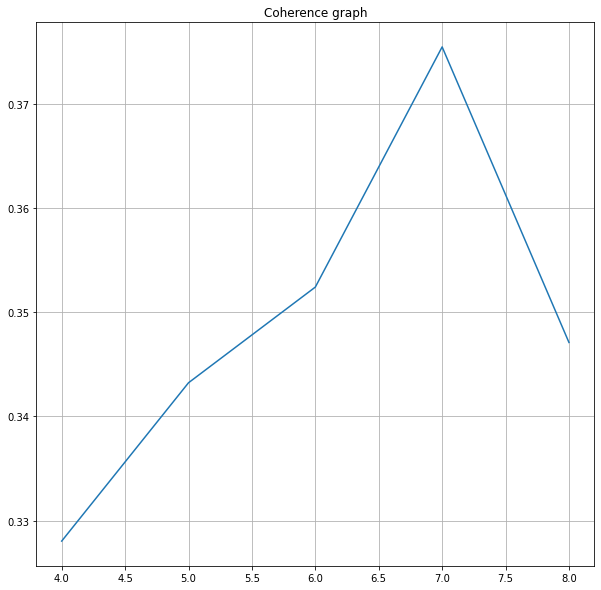

In [9]:
plt.figure(figsize=(10, 10))

plt.plot([x for x in range(start, topic_nb +2, step)], coherence_list)

plt.grid()
plt.title("Coherence graph")

plt.show()


In [10]:
lda_model = LdaModel(
        corpus= vectors, # corpus,
        id2word= dictionary, # id2word,
        num_topics= topic_nb,
        # per_word_topics= True,
        # alpha='asymmetric',
        random_state= random_state
    )

cm = CoherenceModel(model= lda_model, texts= docs, 
                    dictionary= dictionary, coherence= "c_v")
cm.get_coherence()

0.3754904342705362

In [11]:
str_words_list = []
idx_words_list = []

for k, v in dictionary.token2id.items():
    str_words_list.append(k)
    idx_words_list.append(v)

# # str_words_list = set(str_words_list)
# # idx_words_list = set(idx_words_list)

Ébauche de prédiction mise de côté. J'ai gardé la suivante.

In [32]:
# from collections import defaultdict

# def predicted_tags(post, post_nb, vectors, corpus, model):
    
#     posts_weights = model[vectors][post_nb]
#     tfidf_vect = vectors[post_nb]
#     word_vect = corpus[post_nb]

#     tags_dict = defaultdict(float)

#     calc_dict = defaultdict(float)

#     post_words = post.split()

#     tags = ""

#     for post_word in post_words:

#         # print(post_word)

#         # Poids du mot par topic
#         # Récupération du poids le plus élevé et son topic
#         ordered_topics = model.get_term_topics(post_word, minimum_probability= 1e-8)
#         #   sorted(model.get_term_topics(post_word, minimum_probability= 1e-8), 
#         #     key= lambda x: x[1], reverse= True)
#         # print(ordered_topics)
#         # topic_word_weight = ordered_topics[0][1]
#         # topic_word_nb = ordered_topics[0][0]
#         # print(topic_word_nb, " - ", topic_word_weight)

#         for topic_n, topic_w in ordered_topics:
#             # print(topic_n, " - ", topic_w)

#             for post_weight in posts_weights:
                
#                 # print(post_weight)
#                 if post_weight[0] == topic_n:
#                     # print(post_weight)
#                     for w_v, t_v in zip(word_vect, tfidf_vect):
#                         if w_v[0] == str_words_list.index(post_word):
#                             tmp_wv = w_v[1]
#                             tmp_tv = t_v[1]

#                             # if w_v[1] > 1:
#                                 # print(post_weight[1], " - ", topic_w)
                                
#                             calc_dict[post_word] += (t_v[1] / (post_weight[1] * topic_w))
        
#         tmp_calc = calc_dict[post_word] / (tmp_wv * tmp_tv)
#         tags_dict[post_word] += (tmp_calc - calc_dict[post_word])**2 - (tmp_calc * calc_dict[post_word])

#     tags_list = [[k, v] for k, v in tags_dict.items()]
#     tags_list = pd.DataFrame(tags_list, columns= ["words", "weights"])

#     # tags_list = tags_list.sort_values(by= "weights", ascending= True).reset_index(drop= True)
    
#     if len(tags_list) > 0:
#         # test = tags_list.loc[tags_list["weights"] < 0, "words"]
#         for tag in tags_list.loc[tags_list["weights"] < 0, "words"]:
#             tags +=  tag + " "
    
#     #     nb_chiffres_first = int(np.log10(tags_list.loc[0, "weights"]))
#     #     nb_chiffres_last = int(np.log10(tags_list.loc[len(tags_list) -1, "weights"]))
#     #     diff = nb_chiffres_first - nb_chiffres_last

#     #     if diff == 0:
#     #         for tag in tags_list["words"]:
#     #             tags += tag + " "
#     #     else:
#     #         for tag in tags_list.loc[:diff -1, "words"]:
#     #             tags += tag + " "

#     return tags
#     #[np.log10(tags_list["weights"]) > nb_chiffres_first - nb_chiffres_last +1]



In [33]:
# ind = 9999

# x= datas.loc[ind, "imp_words"]
# predicted_tags(x, datas[datas["imp_words"] == x].index[0], 
#     vectors, corpus, lda_model)

In [34]:
# datas.loc[ind, "imp_words"]

In [36]:
# datas.loc[ind, "Tags"]

Ébauche de prédiction gardée.

In [39]:
from collections import defaultdict

def predicted_tags(post, post_nb, vector, model, tags_list):
    tops_wds = model.show_topics(num_words= 50, formatted= False)
    topics_words = defaultdict(dict)
    for top_wrd in tops_wds:
        for wd_wgt in top_wrd[1]:
            topics_words[top_wrd[0]][wd_wgt[0]] = wd_wgt[1]

    post_topics_weights = model[vector][post_nb] # sorted(model[vector][post_nb], key= lambda x: x[1], reverse= True)[0]

    results_dict = defaultdict(int)
    nb_word_dict = defaultdict(int)

    for post_topic_weight in post_topics_weights:
        post_topic = post_topic_weight[0]
        post_weight = post_topic_weight[1]

        for word in post.split():
            nb_word_dict[word] += 1
        
        for word in post.split():
            if nb_word_dict[word] > 1:
                if topics_words[post_topic].get(word) is not None:
                    results_dict[word] += topics_words[post_topic][word] * post_weight #

    tmp_results = sorted([[k, v] for k, v in results_dict.items() if k in tags_list.values], 
        key= lambda x: x[1], reverse= True)
    
    return " ".join([k[0] for k in tmp_results])

In [40]:
tags_list = pd.read_csv("TagSynonyms.csv")["TargetTagName"]

ind = 8521

post = datas.loc[ind, "imp_words"]
predicted_tags(post, datas[datas["imp_words"] == post].index[0], corpus, lda_model, tags_list)

'python list'

In [41]:
datas["pred_tags"] = datas["imp_words"].apply(lambda x: predicted_tags(x, datas[datas["imp_words"] == x].index[0], 
    corpus, lda_model, tags_list))

In [42]:
datas.to_csv("P5_09_pred_tags_datas.csv", index= False)

In [44]:
# files.download("P5_09_pred_tags_datas.csv")

In [43]:
datas = pd.read_csv("P5_09_pred_tags_datas.csv")

datas[:20]

,stem_words,imp_words,Tags,labels,pred_tags
0,open multi frame tiff imageformat image .net 2...,open multi frame tiff image .net 2.0 path stre...,c# tiff system.drawing,0,file .net image methods path object return
1,determine number line within text file easy wa...,determine number line within text file easy wa...,c# input text-files,0,file line
2,add columns datatable bind datagridview update...,add columns datatable bind datagridview update...,c# winforms visual-studio-2008 datagridvie...,0,columns file user
3,move exist code test drive development recentl...,move exist code test drive development recentl...,c# tdd nunit,0,.net c# class methods dll project
4,invoke asynchronous call c# web service consum...,invoke asynchronous call c# web service consum...,c# web-services asynchronous function-calls,0,service c#
5,force call base methods outside derive class t...,force call base methods outside derive class t...,c# inheritance overriding,0,class methods new-operator
6,future proof large user-interface application ...,future proof large user-interface application ...,c# c++ winforms mfc user-interface,0,c# .net new-operator process
7,split xml document chunk large xml document ne...,split xml document chunk large xml document ne...,c# xml .net-2.0,0,date windows process service xml document elem...
8,contain workaround use linq entities try creat...,contain workaround linq entities try create qu...,c# linq entity-framework .net-3.5 linq-to...,0,list select
9,stop taskbar flash know programmatically makef...,stop taskbar flash know programmatically makef...,c# winforms taskbar,0,user


Méthode de scoring mise de côté

In [ ]:
# def score(tags_list, pred_tags_list):
#     score_list = []

#     for num, (tags, pred_tags) in enumerate(zip(tags_list, pred_tags_list)):
#         if (num +1) % 1000 == 0:
#             print(f"{num +1} / {len(pred_tags_list)}")
        
#         tmp_score = 0
        
#         if type(pred_tags) == str:
#             tags = tags.split()
#             pred_tags = pred_tags.split()

#             # counter = 0
#             # for tag in tags:
#             #     for pred_tag in pred_tags:
#             #         if pred_tag in tag:
#             #             tmp_score += (len(pred_tag) / len(tag))
#             #             counter += 1


#             for tag in tags:

#                 if tag in pred_tags:
#                     # print(f"{num}: {tag}")
#                     tmp_score += 1
#                 else:
#                     for pred_tag in pred_tags:
#                         # print(tag)
#                         # print(" ".join(tag.split("-")))
#                         if pred_tag in "".join(tag.split("-")):
#                             tmp_score += (len(pred_tag) / len(tag))
#                             # print(f"{num}: {pred_tag} - {tag}\n{len(pred_tag) / len(tag)}")
#         if tmp_score > 0:
#             score_list.append((tmp_score / len(tags)) ) #np.log((tmp_score * (len(tags) / len(pred_tags))) +1))
#         else:
#             score_list.append(tmp_score)

#     return score_list


In [ ]:
# scores = score(datas["Tags"], datas["pred_tags"])

In [ ]:
# np.mean(scores)

In [ ]:
# sorted_scores = sorted(scores)

# plt.plot(sorted_scores)
# plt.axhline(np.mean(scores), ls= "--", c= "b", label= f"Moy - {np.round(np.mean(scores), 3)}")
# q25 = np.quantile(scores, 0.25)
# plt.axhline(q25, ls= "--", c= "r", label= f"Q 0.25 - {np.round(q25, 3)}")
# q50 = np.quantile(scores, 0.5)
# plt.axhline(q50, ls= "--", c= "g", label= f"Q 0.5 - {np.round(q50, 3)}")
# q75 = np.quantile(scores, 0.75)
# plt.axhline(q75, ls= "--", c= "r", label= f"Q 0.75 - {np.round(q75, 3)}")

# plt.legend()
# plt.show()

In [45]:
# len(lda_model[vectors])

from collections import defaultdict

df_dict = defaultdict(list)

vectors = lda_model[vectors]
for i in range(len(vectors)):
    for j in range(len(vectors[i])):
        df_dict[vectors[i][j][0]].append(vectors[i][j][1])


In [46]:
topics_by_docs = pd.DataFrame(df_dict)

topics_by_docs

,0,1,2,3,4,5,6
0,0.034781,0.621719,0.034772,0.204318,0.034836,0.034788,0.034755
1,0.773689,0.037746,0.037760,0.037774,0.037648,0.037727,0.037735
2,0.552108,0.020631,0.020827,0.020666,0.020739,0.021063,0.344001
3,0.022594,0.022451,0.022430,0.022437,0.022513,0.294497,0.593071
4,0.028627,0.028620,0.028578,0.028658,0.828161,0.028630,0.028710
...,...,...,...,...,...,...,...
9995,0.213621,0.027090,0.027062,0.027110,0.533189,0.027125,0.145453
9996,0.020713,0.020656,0.020654,0.057834,0.067388,0.479768,0.332888
9997,0.819894,0.030037,0.030064,0.029982,0.030005,0.029992,0.030031
9998,0.488862,0.023751,0.023828,0.023817,0.389410,0.024141,0.029279


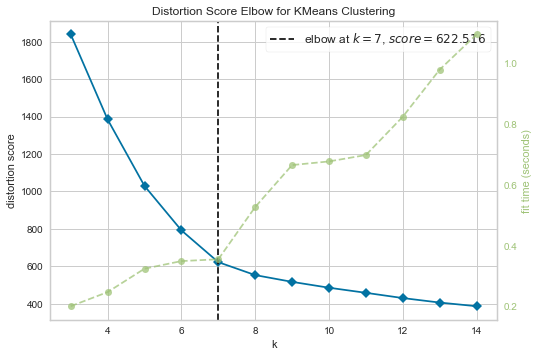

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
k_viz = KElbowVisualizer(km, k= (3, 15))
k_viz.fit(topics_by_docs)
k_viz.poof()

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(10)
# pca.fit(topics_by_docs)

# X_pca = pca.transform(topics_by_docs)

In [ ]:
# var_cumsum = pca.explained_variance_ratio_.cumsum()

# print(var_cumsum[-1])

# plt.bar([x for x in [0,1]], pca. explained_variance_ratio_)
# plt.plot([x for x in [0,1]], var_cumsum, "ro-")

# plt.show()

In [48]:
from sklearn.manifold import TSNE

t_tsne = TSNE(init= "pca", learning_rate= "auto", random_state= 42)

t_tsne_df = t_tsne.fit_transform(topics_by_docs)
t_tsne_df = pd.DataFrame(t_tsne_df, columns= ["PC0", "PC1"])

C:\Users\nanar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<AxesSubplot:xlabel='PC0', ylabel='PC1'>

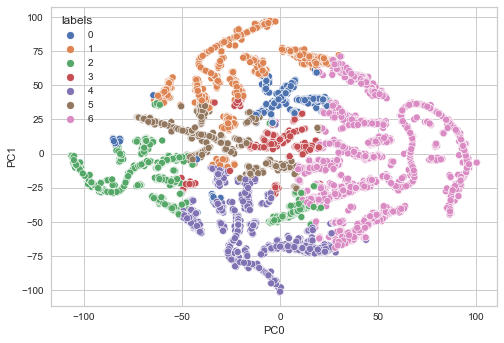

In [49]:
import seaborn as sns

kmean = KMeans(k_viz.elbow_value_).fit(topics_by_docs)

# df_pca = pd.DataFrame(X_pca, columns= ["PC0", "PC1"])
# df_pca["labels"] = kmean.labels_
t_tsne_df["labels"] = kmean.labels_

sns.scatterplot(data= t_tsne_df, x= "PC0", y= "PC1", hue= "labels", palette= "deep")

# plt.scatter([X_pca[:, 0]], [X_pca[:, 1]], c= kmean.labels_, cmap= "hsv", 
#     label= kmean.labels_)

# plt.legend()
# plt.show()

In [50]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

print(f"Silhouette score des clusters des topics:\n\t{silhouette_score(topics_by_docs, kmean.labels_)}")
print(f"ARI entre les clusters des topics et les clusters des tags:\n\t"
    f"{adjusted_rand_score(datas['labels'], t_tsne_df['labels'])}")

Silhouette score des clusters des topics:
	0.5515666604042053
ARI entre les clusters des topics et les clusters des tags:
	0.011882087696969306


KMeans sur les tags prédits puis kmeans et ari avec les originaux.

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

datas["pred_tags"] = datas["pred_tags"].fillna("")

tags_vects = CountVectorizer(token_pattern= r'[\S]+', dtype= np.int8)

bow = tags_vects.fit_transform(datas["pred_tags"])

tags_df = pd.DataFrame(bow.toarray(), columns= tags_vects.get_feature_names_out())

tags_df

,.net,3d,api,asp.net,assembly,browser,build,button,byte,c#,certificate,char,class,client,columns,com,command,compiler-construction,compression,connection,constants,constructor,cookies,css,database,date,directory,dll,document,download,element,email,error,events,exception,expression,file,fonts,function,html,html-table,hyperlink,iframe,image,import,input,installation,integer,interface,internet-explorer,jar,java,javascript,join,jpeg,jquery,line,linq,list,methods,module,multithreading,new-operator,object,operating-system,package,parameters,path,point,pointers,postgresql,procedure,process,project,properties,prototype,python,query,random,regex,return,select,service,session,sql,static,std,string,system,table,templates,text,upload,user,vector,wcf,web,widget,windows,xml
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
# from sklearn.decomposition import PCA

# components = 1500

# tPCA = PCA(n_components= components, random_state= 42)
# tPCA.fit(tags_df)

# tPCA_df = pd.DataFrame(tPCA.transform(tags_df))

# tsvd_expl_ratio_sum = tPCA.explained_variance_ratio_.cumsum()

# tsvd_expl_ratio_sum[-1:]

In [55]:
from sklearn.manifold import TSNE

t_tsne = TSNE(init= "random", learning_rate= "auto", random_state= 42)

t_tsne_df = t_tsne.fit_transform(tags_df)
t_tsne_df = pd.DataFrame(t_tsne_df, columns= ["PC0", "PC1"])

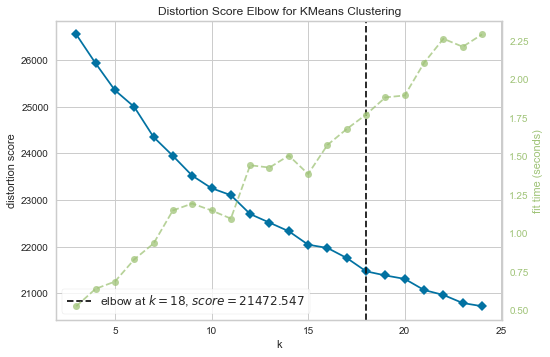

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
t_k_viz = KElbowVisualizer(KMeans(random_state= 42), k=(3, 25))
t_k_viz.fit(tags_df)
t_k_viz.poof()

In [58]:
kmean = KMeans(n_clusters= t_k_viz.elbow_value_, random_state= 42).fit(tags_df)

t_tsne_df["labels"] = kmean.labels_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


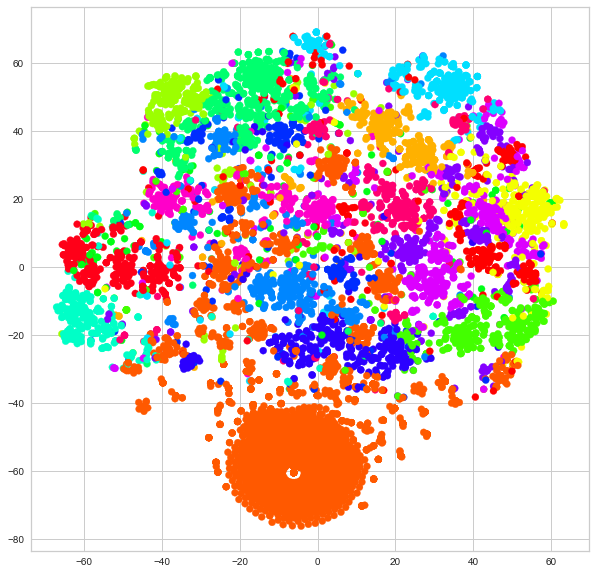

In [59]:
plt.figure(figsize=(10, 10))

plt.scatter(t_tsne_df.loc[:, "PC0"], t_tsne_df.loc[:, "PC1"], c= t_tsne_df.loc[:, "labels"], cmap= "hsv")

plt.legend()
plt.show()

In [61]:
print(f"Silhouette score des clusters des tags: {silhouette_score(tags_df, t_tsne_df['labels'])}")

print(f"ARI entre les clusters des tags originaux et ceux prédits: "
    f"{adjusted_rand_score(datas['labels'], t_tsne_df['labels'])}")

Silhouette score des clusters des tags: 0.09750753094087526
ARI entre les clusters des tags originaux et ceux prédits: 0.10372184890087696
